In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [76]:
#reading dataset
data= pd.read_csv('Cab_Rides.csv')
data.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [77]:
#taking info of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [78]:
#checking duplicates
data.duplicated().sum()

1

In [79]:
#dropping duplicates
data= data.drop_duplicates()

In [80]:
data.isnull().sum()/len(data) *100

#43% of data is missing from purpose feature

START_DATE*     0.000000
END_DATE*       0.000000
CATEGORY*       0.000000
START*          0.000000
STOP*           0.000000
MILES*          0.000000
PURPOSE*       43.500867
dtype: float64

In [81]:
# I am going to change feature names of our dataset

data.rename(columns= {'START_DATE*': 'start_date',
                     'END_DATE*':'end_date',
                     'CATEGORY*':'category',
                     'START*':'start',
                     'STOP*':'stop',
                     'MILES*':'miles',
                     'PURPOSE*':'purpose'}, inplace= True)

data.iloc[:,:-1].columns

Index(['start_date', 'end_date', 'category', 'start', 'stop', 'miles'], dtype='object')

In [82]:
#importing some important libraries
from datetime import datetime
from datetime import date
from datetime import time

### converting data types of start and end features into datetime object

In [83]:
#start_date
data['start_date']= pd.to_datetime(data['start_date'])

In [84]:
#end_date
data['end_date']= pd.to_datetime(data['end_date'])
data['end_date'].head()

0   2016-01-01 21:17:00
1   2016-01-02 01:37:00
2   2016-01-02 20:38:00
3   2016-01-05 17:45:00
4   2016-01-06 15:49:00
Name: end_date, dtype: datetime64[ns]

In [85]:
# checking dtypes of features to get extra sure
data.dtypes

start_date    datetime64[ns]
end_date      datetime64[ns]
category              object
start                 object
stop                  object
miles                float64
purpose               object
dtype: object

In [86]:
## I have calculated durations in 

In [87]:
from datetime import timedelta
data['duaration_in_sec']= (data['end_date']-data['start_date'])/timedelta(seconds=1)

In [88]:
#data['duration_in_min']= (data['end_date']-data['start_date'])/timedelta(minutes=1)

In [89]:
data.head()

,start_date,end_date,category,start,stop,miles,purpose,duaration_in_sec
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,360.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,720.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,780.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,840.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,4020.0


In [90]:
# start_date
data['st_hour']= data['start_date'].dt.hour #extracting at what hour of the day ride started
data['st_day']= data['start_date'].dt.day  
data['st_month']= data['start_date'].dt.month  

data['st_week']= data['start_date'].dt.week  
data['st_weekday']= data['start_date'].dt.weekday  #extracting on what day of the week ride started(mon,thus,fri,sat...)

In [91]:
#end_date
data['ed_hour']= data['end_date'].dt.hour
data['ed_day']= data['end_date'].dt.day
#data['ed_month']= data['end_date'].dt.month

#data['ed_week']= data['end_date'].dt.week
#data['ed_weekday']= data['end_date'].dt.weekday

In [92]:
# SOMETHING INTRESTING TO NOTICE

data['duaration_in_sec'].describe()

# min value for duration in sec is 0, let us get some more insights!

count     1154.000000
mean      1394.506066
std       1639.804308
min          0.000000
25%        600.000000
50%        960.000000
75%       1665.000000
max      20160.000000
Name: duaration_in_sec, dtype: float64

In [93]:
data[data['duaration_in_sec']==0]

# there are 4 rides in our datasets which have same start and end datetime

,start_date,end_date,category,start,stop,miles,purpose,duaration_in_sec,st_hour,st_day,st_month,st_week,st_weekday,ed_hour,ed_day
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,NaN,0.0,17,6,9,36,1,17,6
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,NaN,0.0,7,16,9,37,4,7,16
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,NaN,0.0,15,8,10,40,5,15,8
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,NaN,0.0,13,13,10,41,3,13,13


In [94]:
data[data['duaration_in_sec']==20160]    #336 minutes (5.6 HOURS)

#max duration ride belongs to business category with 195.6 miles 

,start_date,end_date,category,start,stop,miles,purpose,duaration_in_sec,st_hour,st_day,st_month,st_week,st_weekday,ed_hour,ed_day
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,NaN,20160.0,21,27,9,39,1,2,28


In [95]:
data.miles.describe().transpose()

# smallest ride is of 0.5 miles and max 310 miles

count    1154.000000
mean       10.567418
std        21.588452
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: miles, dtype: float64

In [96]:
#extracting row from the dataset having max value of  miles 

data.loc[data.miles== 310.3]

#here we can see that the longest ride comes under business category and purpose was customer visit, from Latta to Jacksonville

,start_date,end_date,category,start,stop,miles,purpose,duaration_in_sec,st_hour,st_day,st_month,st_week,st_weekday,ed_hour,ed_day
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310.3,Customer Visit,19800.0,16,25,3,12,4,22,25


In [97]:
data[data.st_day != data.ed_day].shape

# since duration of rides are no longer than 5.6 hours, therefore most of the rides start and end on the same day
# But there are 14 such rides that do not have same start_date or end_date (it means ride do not end on the same day) bcoz they are actually starting late night

(14, 15)

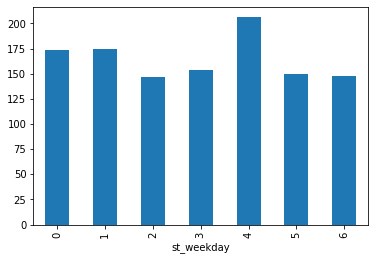

In [98]:
data.groupby('st_weekday')['st_weekday'].agg('count').plot(kind = 'bar')

# we observe that number of rides are highest on the friday   

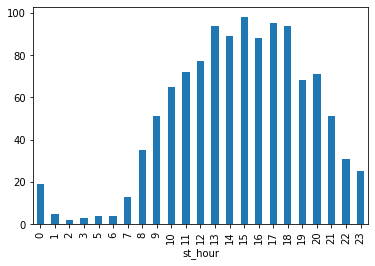

In [99]:
data.groupby('st_hour')['st_hour'].agg('count').plot(kind = 'bar')

# from the graph we can observe that rushing hours are between 8.am to 12.pm

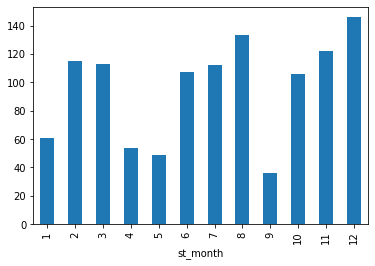

In [100]:
data.groupby('st_month')['st_month'].agg('count').plot(kind='bar')

# minimum ride were taken in the month of september and max ride were taken in the month of december
#we can observe kind of pattern in our graph

In [101]:
# CATEGORY
data.category.unique()

array(['Business', 'Personal'], dtype=object)

' from below graph we can say that most of the rides lies under business category '

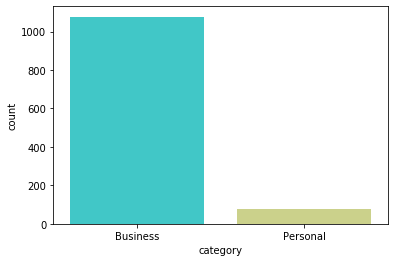

In [102]:
sns.countplot(x= 'category', data= data, palette= 'rainbow', orient= 'v')


''' from below graph we can say that most of the rides lies under business category '''

In [103]:
''' on grouping category by purpose of the ride , we noticed that highest no of rides were taken for business meetings '''

data.groupby('category').purpose.value_counts().to_frame()

purpose
category purpose                 
Business Meeting              186
         Meal/Entertain       160
         Errand/Supplies      128
         Customer Visit       101
         Temporary Site        50
         Between Offices       18
         Airport/Travel         3
Personal Moving                 4
         Charity ($)            1
         Commute                1

In [104]:
data['start'].value_counts()

#most of the cabs were booked from Cary

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Krendle Woods         1
Ingleside             1
Austin                1
Eastgate              1
Jackson Heights       1
Name: start, Length: 177, dtype: int64

In [105]:
data['stop'].value_counts()

# carry must be a meeting point 

Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
South Berkeley        1
Cedar Hill            1
Bywater               1
Vista East            1
Jackson Heights       1
Name: stop, Length: 188, dtype: int64

### making new column 

In [106]:
data['Ride']= 0

In [107]:

data.loc[(data.start == data.stop), ['Ride']] = 'Local'

data.loc[(data.start != data.stop), ['Ride']] = 'Out_of_city'


data['Ride'].dtype

dtype('O')

In [108]:
data['Ride'].unique()

array(['Local', 'Out_of_city'], dtype=object)

In [109]:
data[data['Ride'] == 'Local']['purpose'].agg('mode')

# rides which have same start and stop city/town are mostly taken for Errand/Supplies purpose

0    Errand/Supplies
dtype: object

In [110]:
data[data['Ride']== 'Out_of_city']['purpose'].agg('mode')

# rides which have same start and stop city/town are mostly taken for Meeting purpose 

0    Meeting
dtype: object

In [111]:
'''I can replace nan values of purpose based on 'local/OS' feature

Errand/Supplies : WHEN  Ride is local 

OR

Meeting : WHEN  Ride is Out_of_city

'''

"I can replace nan values of purpose based on 'local/OS' feature\n\nErrand/Supplies : WHEN  Ride is local \n\nOR\n\nMeeting : WHEN  Ride is Out_of_city\n\n"

In [121]:
len(data.start.unique())

177